# Практическое задание №1

## Статистическое исследование данных

Числовые характеристики:
Объем выборки (n): 80
Среднее арифметическое: 1119.49
Медиана: 253.00
Мода: 47.00
Дисперсия: 17399171.49
Стандартное отклонение: 4171.23
Минимум: 12.00
Максимум: 36132.00
Первый квартиль (Q1): 125.50
Третий квартиль (Q3): 711.00
Межквартильный размах (IQR): 585.50
Асимметрия (skew): 7.63
Эксцесс (kurt): 60.80

Тест Шапиро-Уилка на нормальность: stat=0.226, p-value=1.587e-18
Тест Шапиро-Уилка на лог-нормальность: stat=0.979, p-value=0.214

95%-й доверительный интервал для среднего: (191.23, 2047.75)

Средний процент докторов наук: 20.53%


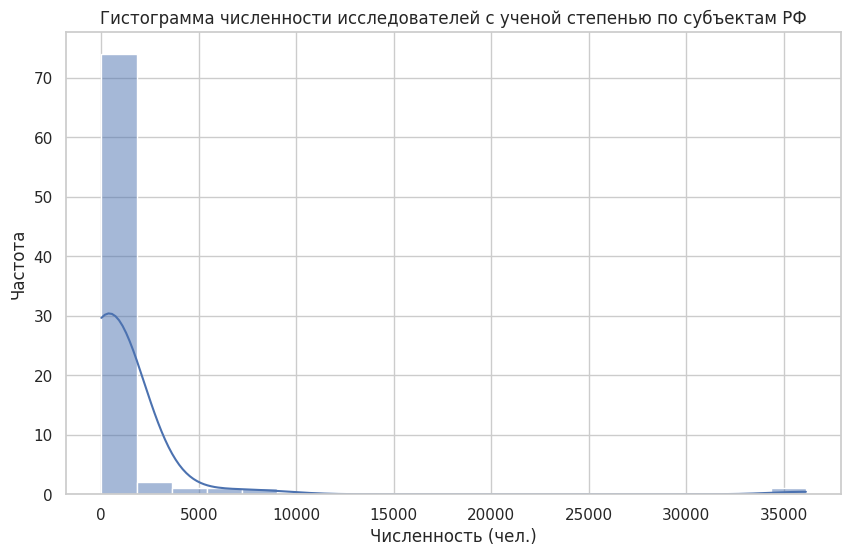

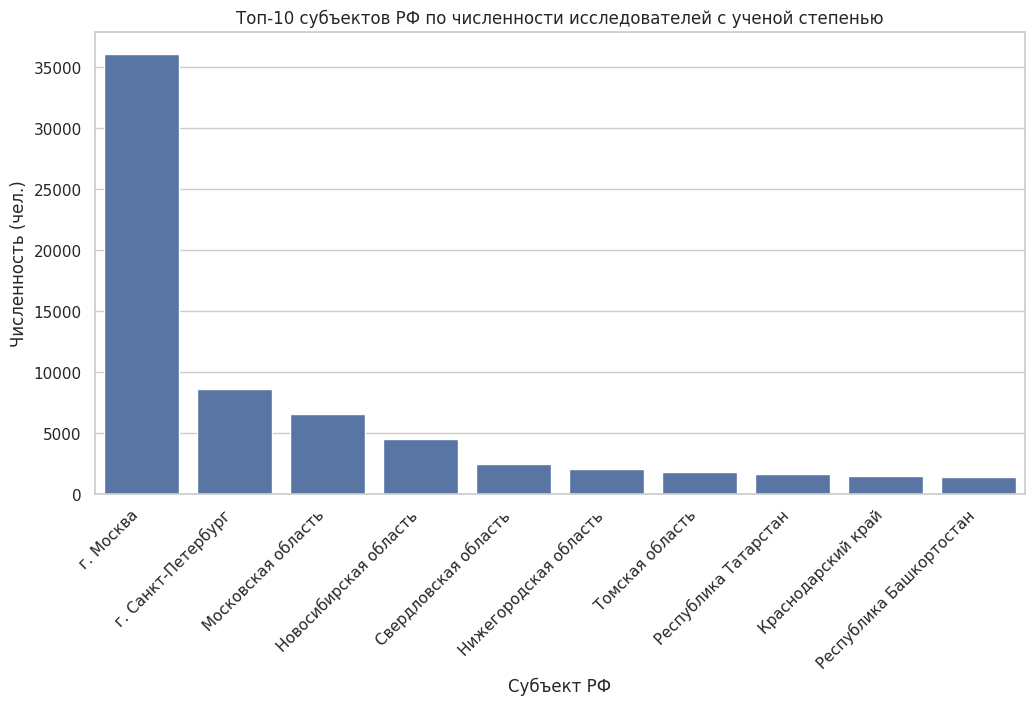

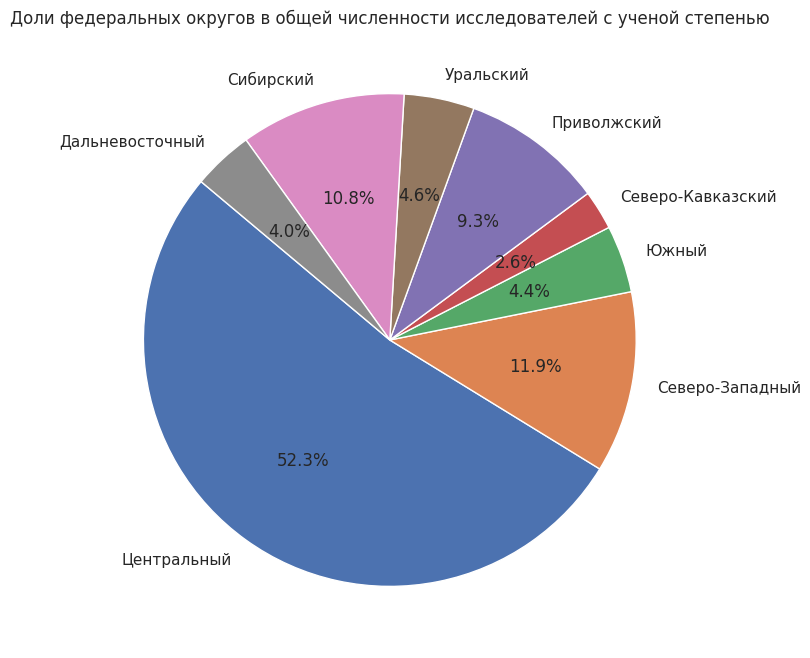

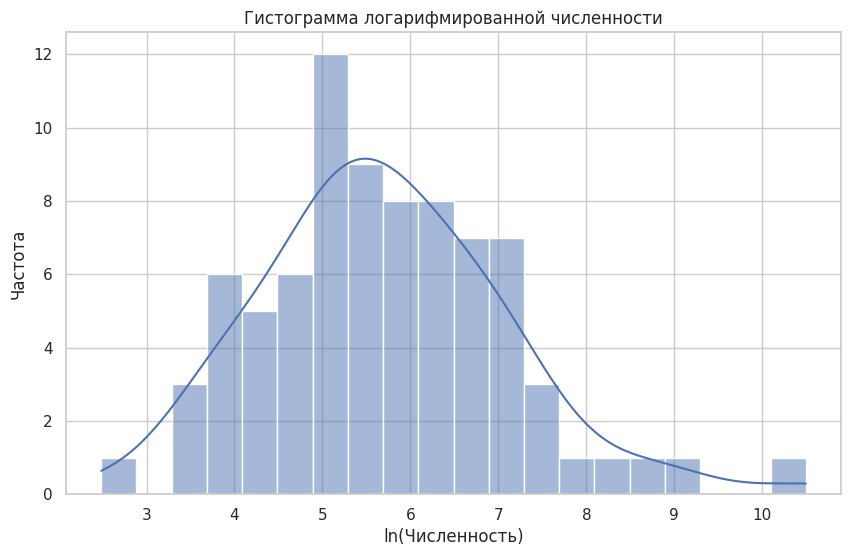

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import io  # Добавьте это для StringIO

sns.set(style="whitegrid")

# Вставьте ваши данные как строку (с табами)
raw_data = """Российская Федерация	89586	21705	67881
Центральный федеральный округ	46892	11879	35013
Белгородская область	334	55	279
Брянская область	46	11	35
Владимирская область	321	41	280
Воронежская область	806	122	684
Ивановская область	230	66	164
Калужская область	518	111	407
Костромская область	12	0	10
Курская область	172	46	126
Липецкая область	192	40	152
Московская область	6505	1313	5192
Орловская область	114	18	96
Рязанская область	126	22	104
Смоленская область	84		69
Тамбовская область	150	37	113
Тверская область	220	33	187
Тульская область	213	27	186
Ярославская область	717	157	560
г. Москва	36132	9763	26369
Северо-Западный федеральный округ	10673	2430	8243
Республика Карелия	277	61	216
Республика Коми	461	95	366
Архангельская область	181	23	158
Архангельская область без АО	0	23	0
Вологодская область	92	0	83
Калининградская область	237	24	213
Ленинградская область	410	85	325
Мурманская область	395	78	317
Новгородская область	31	7	24
Псковская область	32		31
г. Санкт-Петербург	8557	2047	6510
Южный федеральный округ	3950	809	3141
Республика Адыгея	56	20	36
Республика Калмыкия	43	12	31
Республика Крым	500	123	377
Краснодарский край	1457	270	1187
Астраханская область	124	18	106
Волгоградская область	351	74	277
Ростовская область	1111	239	872
г. Севастополь	308	53	255
Северо-Кавказский федеральный округ	2320	541	1779
Республика Дагестан	480	142	338
Республика Ингушетия 	45	14	31
Кабардино-Балкарская Республика	329	83	246
Карачаево-Черкесская Республика	158	26	132
Республика Северная Осетия - Алания	145	39	106
Чеченская Республика 	150	60	90
Ставропольский край	1013	177	836
Приволжский федеральный округ	8349	1762	6587
Республика Башкортостан	1346	339	1007
Республика Марий Эл	47	8	39
Республика Мордовия	88	21	67
Республика Татарстан	1570	317	1253
Удмуртская Республика	233	54	179
Чувашская Республика	62	8	54
Пермский край	793	155	638
Кировская область	191	47	144
Нижегородская область	2047	422	1625
Оренбургская область	194	59	135
Пензенская область	185	30	155
Самарская область	535	98	437
Саратовская область	843	180	663
Ульяновская область	215	24	191
Уральский федеральный округ	4129	944	3185
Курганская область	97	22	75
Свердловская область	2439	592	1847
Тюменская область		93	416
Тюменская область без АО	509	71	343
Челябинская область	1084	237	847
Сибирский федеральный округ	9719	2565	7154
Республика Алтай   	27	3	24
Республика Тыва	79	12	67
Республика Хакасия	47	5	42
Алтайский край	689	108	581
Красноярский край	869	186	683
Иркутская область	1092	279	813
Кемеровская область	453	139	314
Новосибирская область	4443	1319	3124
Омская область	269	39	230
Томская область	1751	475	1276
Дальневосточный федеральный округ	3554	775	2779
Республика Бурятия	377	108	269
Республика Саха (Якутия)	709	155	554
Забайкальский край	65	10	55
Камчатский край	158	32	126
Приморский край	1275	275	1000
Хабаровский край	462	105	357
Амурская область	230	45	185
Магаданская область	154	0	127
Сахалинская область	97	13	84"""

# Парсинг как tab-separated
df = pd.read_csv(io.StringIO(raw_data), sep='\t', names=['Region', 'Total', 'Doctors', 'Candidates'], engine='python')

# Преобразование в числа (пустые → NaN)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Doctors'] = pd.to_numeric(df['Doctors'], errors='coerce')
df['Candidates'] = pd.to_numeric(df['Candidates'], errors='coerce')

# Заполнение пропусков логично
# Если Doctors NaN, но Total и Candidates есть → Doctors = Total - Candidates
mask_doctors = df['Doctors'].isna() & df['Total'].notna() & df['Candidates'].notna()
df.loc[mask_doctors, 'Doctors'] = df.loc[mask_doctors, 'Total'] - df.loc[mask_doctors, 'Candidates']

# Если Total NaN, но Doctors и Candidates есть → Total = Doctors + Candidates
mask_total = df['Total'].isna() & df['Doctors'].notna() & df['Candidates'].notna()
df.loc[mask_total, 'Total'] = df.loc[mask_total, 'Doctors'] + df.loc[mask_total, 'Candidates']

# Ручное исправление несоответствий (если Total != Doctors + Candidates, корректируем на основе данных)
# Например, для Костромской: 12 != 0 + 10, предположим Doctors=2 (как 12-10)
df.loc[df['Region'] == 'Костромская область', 'Doctors'] = 2  # Исправление несоответствия
# Для Вологодской: 92 != 0 + 83 → Doctors=9
df.loc[df['Region'] == 'Вологодская область', 'Doctors'] = 92 - 83
# Для Магаданской: 154 != 0 + 127 → Doctors=27
df.loc[df['Region'] == 'Магаданская область', 'Doctors'] = 154 - 127
# Для Архангельской без АО: 0 != 23 + 0, но это aggregate, пропустим позже

# Список агрегированных строк для исключения (обновлённый под ваши данные)
aggregates = [
    'Российская Федерация',
    'Центральный федеральный округ',
    'Северо-Западный федеральный округ',
    'Южный федеральный округ',
    'Северо-Кавказский федеральный округ',
    'Приволжский федеральный округ',
    'Уральский федеральный округ',
    'Сибирский федеральный округ',
    'Дальневосточный федеральный округ',
    'Архангельская область без АО',
    'Тюменская область без АО',
    # Добавьте, если есть другие, как 'в том числе: ...'
]

# Фильтр на субъекты (только с данными)
subjects_df = df[~df['Region'].isin(aggregates) & df['Total'].notna()].copy()

# Дополнительные столбцы
subjects_df['Pct_Doctors'] = (subjects_df['Doctors'] / subjects_df['Total']) * 100
subjects_df['Pct_Candidates'] = (subjects_df['Candidates'] / subjects_df['Total']) * 100

# Выборка для анализа (столбец Total)
totals = subjects_df['Total']

# 1.4 Числовые характеристики
n = len(totals)
mean = totals.mean()
median = totals.median()
mode = totals.mode()[0]
variance = totals.var()
std = totals.std()
min_val = totals.min()
max_val = totals.max()
q1 = totals.quantile(0.25)
q3 = totals.quantile(0.75)
iqr = q3 - q1
skew = stats.skew(totals)
kurt = stats.kurtosis(totals)

print("Числовые характеристики:")
print(f"Объем выборки (n): {n}")
print(f"Среднее арифметическое: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Мода: {mode:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Минимум: {min_val:.2f}")
print(f"Максимум: {max_val:.2f}")
print(f"Первый квартиль (Q1): {q1:.2f}")
print(f"Третий квартиль (Q3): {q3:.2f}")
print(f"Межквартильный размах (IQR): {iqr:.2f}")
print(f"Асимметрия (skew): {skew:.2f}")
print(f"Эксцесс (kurt): {kurt:.2f}")

# 1.5 Оценка распределения
shapiro_stat, shapiro_p = stats.shapiro(totals)
print(f"\nТест Шапиро-Уилка на нормальность: stat={shapiro_stat:.3f}, p-value={shapiro_p:.3e}")

log_totals = np.log(totals)  # Логарифмирование
shapiro_log_stat, shapiro_log_p = stats.shapiro(log_totals)
print(f"Тест Шапиро-Уилка на лог-нормальность: stat={shapiro_log_stat:.3f}, p-value={shapiro_log_p:.3f}")

# 1.6 Доверительные интервалы
conf_int = stats.t.interval(0.95, n-1, loc=mean, scale=stats.sem(totals))
print(f"\n95%-й доверительный интервал для среднего: ({conf_int[0]:.2f}, {conf_int[1]:.2f})")

# Дополнительные показатели (2.3)
mean_pct_doctors = subjects_df['Pct_Doctors'].mean()
print(f"\nСредний процент докторов наук: {mean_pct_doctors:.2f}%")

# Визуализации (1.3 и другие)
# Гистограмма
plt.figure(figsize=(10,6))
sns.histplot(totals, bins=20, kde=True)
plt.title('Гистограмма численности исследователей с ученой степенью по субъектам РФ')
plt.xlabel('Численность (чел.)')
plt.ylabel('Частота')
plt.show()

# Столбчатая диаграмма для топ-10 субъектов
top10 = subjects_df.sort_values('Total', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Total', data=top10)
plt.xticks(rotation=45, ha='right')
plt.title('Топ-10 субъектов РФ по численности исследователей с ученой степенью')
plt.xlabel('Субъект РФ')
plt.ylabel('Численность (чел.)')
plt.show()

# Круговая диаграмма для долей по федеральным округам (ручное группирование)
# Суммы по округам из исходных данных
districts = {
    'Центральный': 46892,
    'Северо-Западный': 10673,
    'Южный': 3950,
    'Северо-Кавказский': 2320,
    'Приволжский': 8349,
    'Уральский': 4129,
    'Сибирский': 9719,
    'Дальневосточный': 3554
}
district_df = pd.DataFrame(list(districts.items()), columns=['District', 'Total'])
plt.figure(figsize=(8,8))
plt.pie(district_df['Total'], labels=district_df['District'], autopct='%1.1f%%', startangle=140)
plt.title('Доли федеральных округов в общей численности исследователей с ученой степенью')
plt.show()

# Для лог-шкалы (для проверки распределения)
plt.figure(figsize=(10,6))
sns.histplot(log_totals, bins=20, kde=True)
plt.title('Гистограмма логарифмированной численности')
plt.xlabel('ln(Численность)')
plt.ylabel('Частота')
plt.show()